# Web Scraping for Tuesday, October 17th

Web scraping is a process of extracting data from websites. Data displayed by websites can be viewed using a web browser, but it is often not possible to save a copy of this data for personal use. The only option then is to manually copy and paste the data. Web scraping is the technique of automating this process

The goals for today's session are:

1. Batch Downloading
2. Intro to Web scraping
3. Task Scheduling

Follow along as we work our way through this document. Use the code cells to test and experiment as we go. Try to complete all of the practice exercises and ask questions if you need assistance.




# Batch Downloading using Wget


Wget is a command-line utility tool for downloading files from the internet using multiple protocols.

Some of the advantages of using the tool are that it can complete downloads even over unstable network connections. If your connection is interupted during a download `wget` can resume the download immediately when you reconnect. It also has the capability to pull recursive downloads which is helpful if you want to create a local version of a webpage.

The wget command can be used in both terminals and scripts. The wget syntax is very simple and follows a pattern:

`wget [option][URL]`

No option needs to be specified. For example, to download a file to the current working directory the following code is all that is necessary:

`wget -c example.com`

Wget uses:
- Download a single file
- Download a directory of files
- Download all files of a certain type in a directory
- Download all files of a particular name in a directory
- Download an entire website

Wget syntax:

To save a download with a specific name you could use the convention `wget -O [file_name] [URL]`.

To save a download to a specific directory you could use the convention `wget -P [directory] [URL]`.

To continue a download after an interuption you could use the convention `wget -c [URL]`.

Wget examples:
 
- wget -r -A .pdf https://www.rkirpalani.com/
- wget -r -l1 --no-parent https://www.ssc.wisc.edu/~ekelly/econ101/
- wget ‐‐output-document=LizKelly.html https://www.ssc.wisc.edu/~ekelly/econ101/
- wget -r --no-parent –A *2018.pdf https://www.ssc.wisc.edu/~ekelly/econ101/
- wget -r --no-parent –A Answers*.pdf https://www.ssc.wisc.edu/~ekelly/econ101/
- wget -r -l1 --no-parent *2019.pdf https://www.ssc.wisc.edu/~ekelly/econ101/ -P C:/Users/matth/newkellyfolder
- wget -e robots=off -r –np URL

And to mirror an entire website you can use the `-m` option. See the code below

`!wget -m 'page.html' https://news.wisc.edu/ be careful, this is HUGE!`

Downloading mulitple files and directories is simple: 

Step 1: save the url for each file in a text file, one url per line

* url1.com/file
* url2.com/file
* url3.com/file

Step 2: type ‘wget -i urls.txt’ on the command line

In addition,

-  To download in the background, include the option -b.
-  To keep trying after a 404 error, use the option -t ‘n’. 	
-  Replace ‘n’ with however many additional tries you desire
-  To limit bandwidth, use the option --limit-rate=200k 
-  This will cap download speed at 200KB/s. 


## Practice Time

Let's take a few minutes to practice with a couple of specific tasks.

1. Provide a wget command to save my headshot from the UW Economics Webpage with the name “picture.jpg”
2. Provide a wget command to download Anaconda to a new folder named “Conda” in the current directory
3. Provide a wget command to mirror Elizabeth Kelly’s ECON101 website
4. Provide a wget command to download every pdf file on Elizabeth Kelly’s ECON101 website
5. Provide a wget command to download every midterm exam saved in .doc or .docx format on Elizabeth Kelly’s ECON101 website

# Web Scraping

Web scraping is a process of extracting data from websites. Data displayed by websites can be viewed using a web browser, but it is often not possible to save a copy of this data for personal use. The only option then is to manually copy and paste the data. Web scraping is the technique of automating this process

Some data sets are downloadable in an easy to use format or accessible via an API. But much of the data on the web lies hidden in html code that is not readily accessible for analysis.

In this notebook we will learn how to perform web scraping using the Beautiful Soup library. We will write code to send a request to a server in order to access the source code [HTML] for a particular page (or pages) hosted online.


## Web Page Design

When we navigate our internet browser to a web page it makes a request to a web server. This is called a `GET` request. The server then sends back files that tell our browser how to visually display the page. Included are:

* HyperText Markup Language (HTML) tells a browser how to display content
* CSS — tells the browser how to style the information 
* JS — Javascript files provide interactivity
* Images files — allow web pages to show pictures

HTML consists of elements called tags. The most basic tag is the \<html\> tag. This tag tells the web browser that everything inside of it is HTML. Tags have a naming hierarchy that depends on their position in relation to other tags:
    
* child is a tag inside another tag
* parent is the tag another tag is inside
* sibiling is a tag that is nested inside the same parent as another tag

For a full list of tags can be found [here](https://developer.mozilla.org/en-US/docs/Web/HTML/Element).
    
There are also `class` and `id` properties that you should know about before getting started. These properties give HTML elements names and make them easier to interact with when we’re scraping.

One element can have multiple classes and a class can be shared between elements. Each element can only have one id, and an id can only be used once on a page. Classes and ids are optional, and not all elements will have them.
    
But before we start parsing a website and pulling data, we should first inspect the site. This will help you understand the site structure to extract the information that’s important to you. Start by opening the site you below in any web browser.
    
https://www.summitcreditunion.com/borrow/mortgage-loan#mortgage-rates

You can decompose the above URL into two main parts:

The base URL represents the path to the mortgage rate page on the Summit Credit Union website. The base URL is https://www.summitcreditunion.com/borrow. The specific site location is the path to the lender's unique resource for seeing up-to-the-minute mortgage rates. To learn more about how the data is structured for display you can use the developer tools built into your browser. Accessing these tools will be very similar to other modern browsers and will allow you to interactively explore the site. In Chrome on macOS, you can open up the developer tools through the menu by selecting *View → Developer → Developer Tools*. On Windows and Linux, you can access them by clicking the top-right menu button (⋮) and selecting *More Tools → Developer Tools*. You can also access your developer tools by right-clicking on the page and selecting the Inspect option or using a keyboard shortcut:

* Mac: Cmd+Alt+I
* Windows/Linux: Ctrl+Shift+I

Use these tools now to see the site structure with clickable HTML elements. Try to expand, collapse, and even edit elements in your browser.

Now let's get started with scraping! Try the code below to request the mortgage rate webpage:

<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head>



  <link rel="profile" href="http://www.w3.org/1999/xhtml/vocab" />
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">

  <!-- Google Tag Manager -->
  <script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-KJ3BG5');<
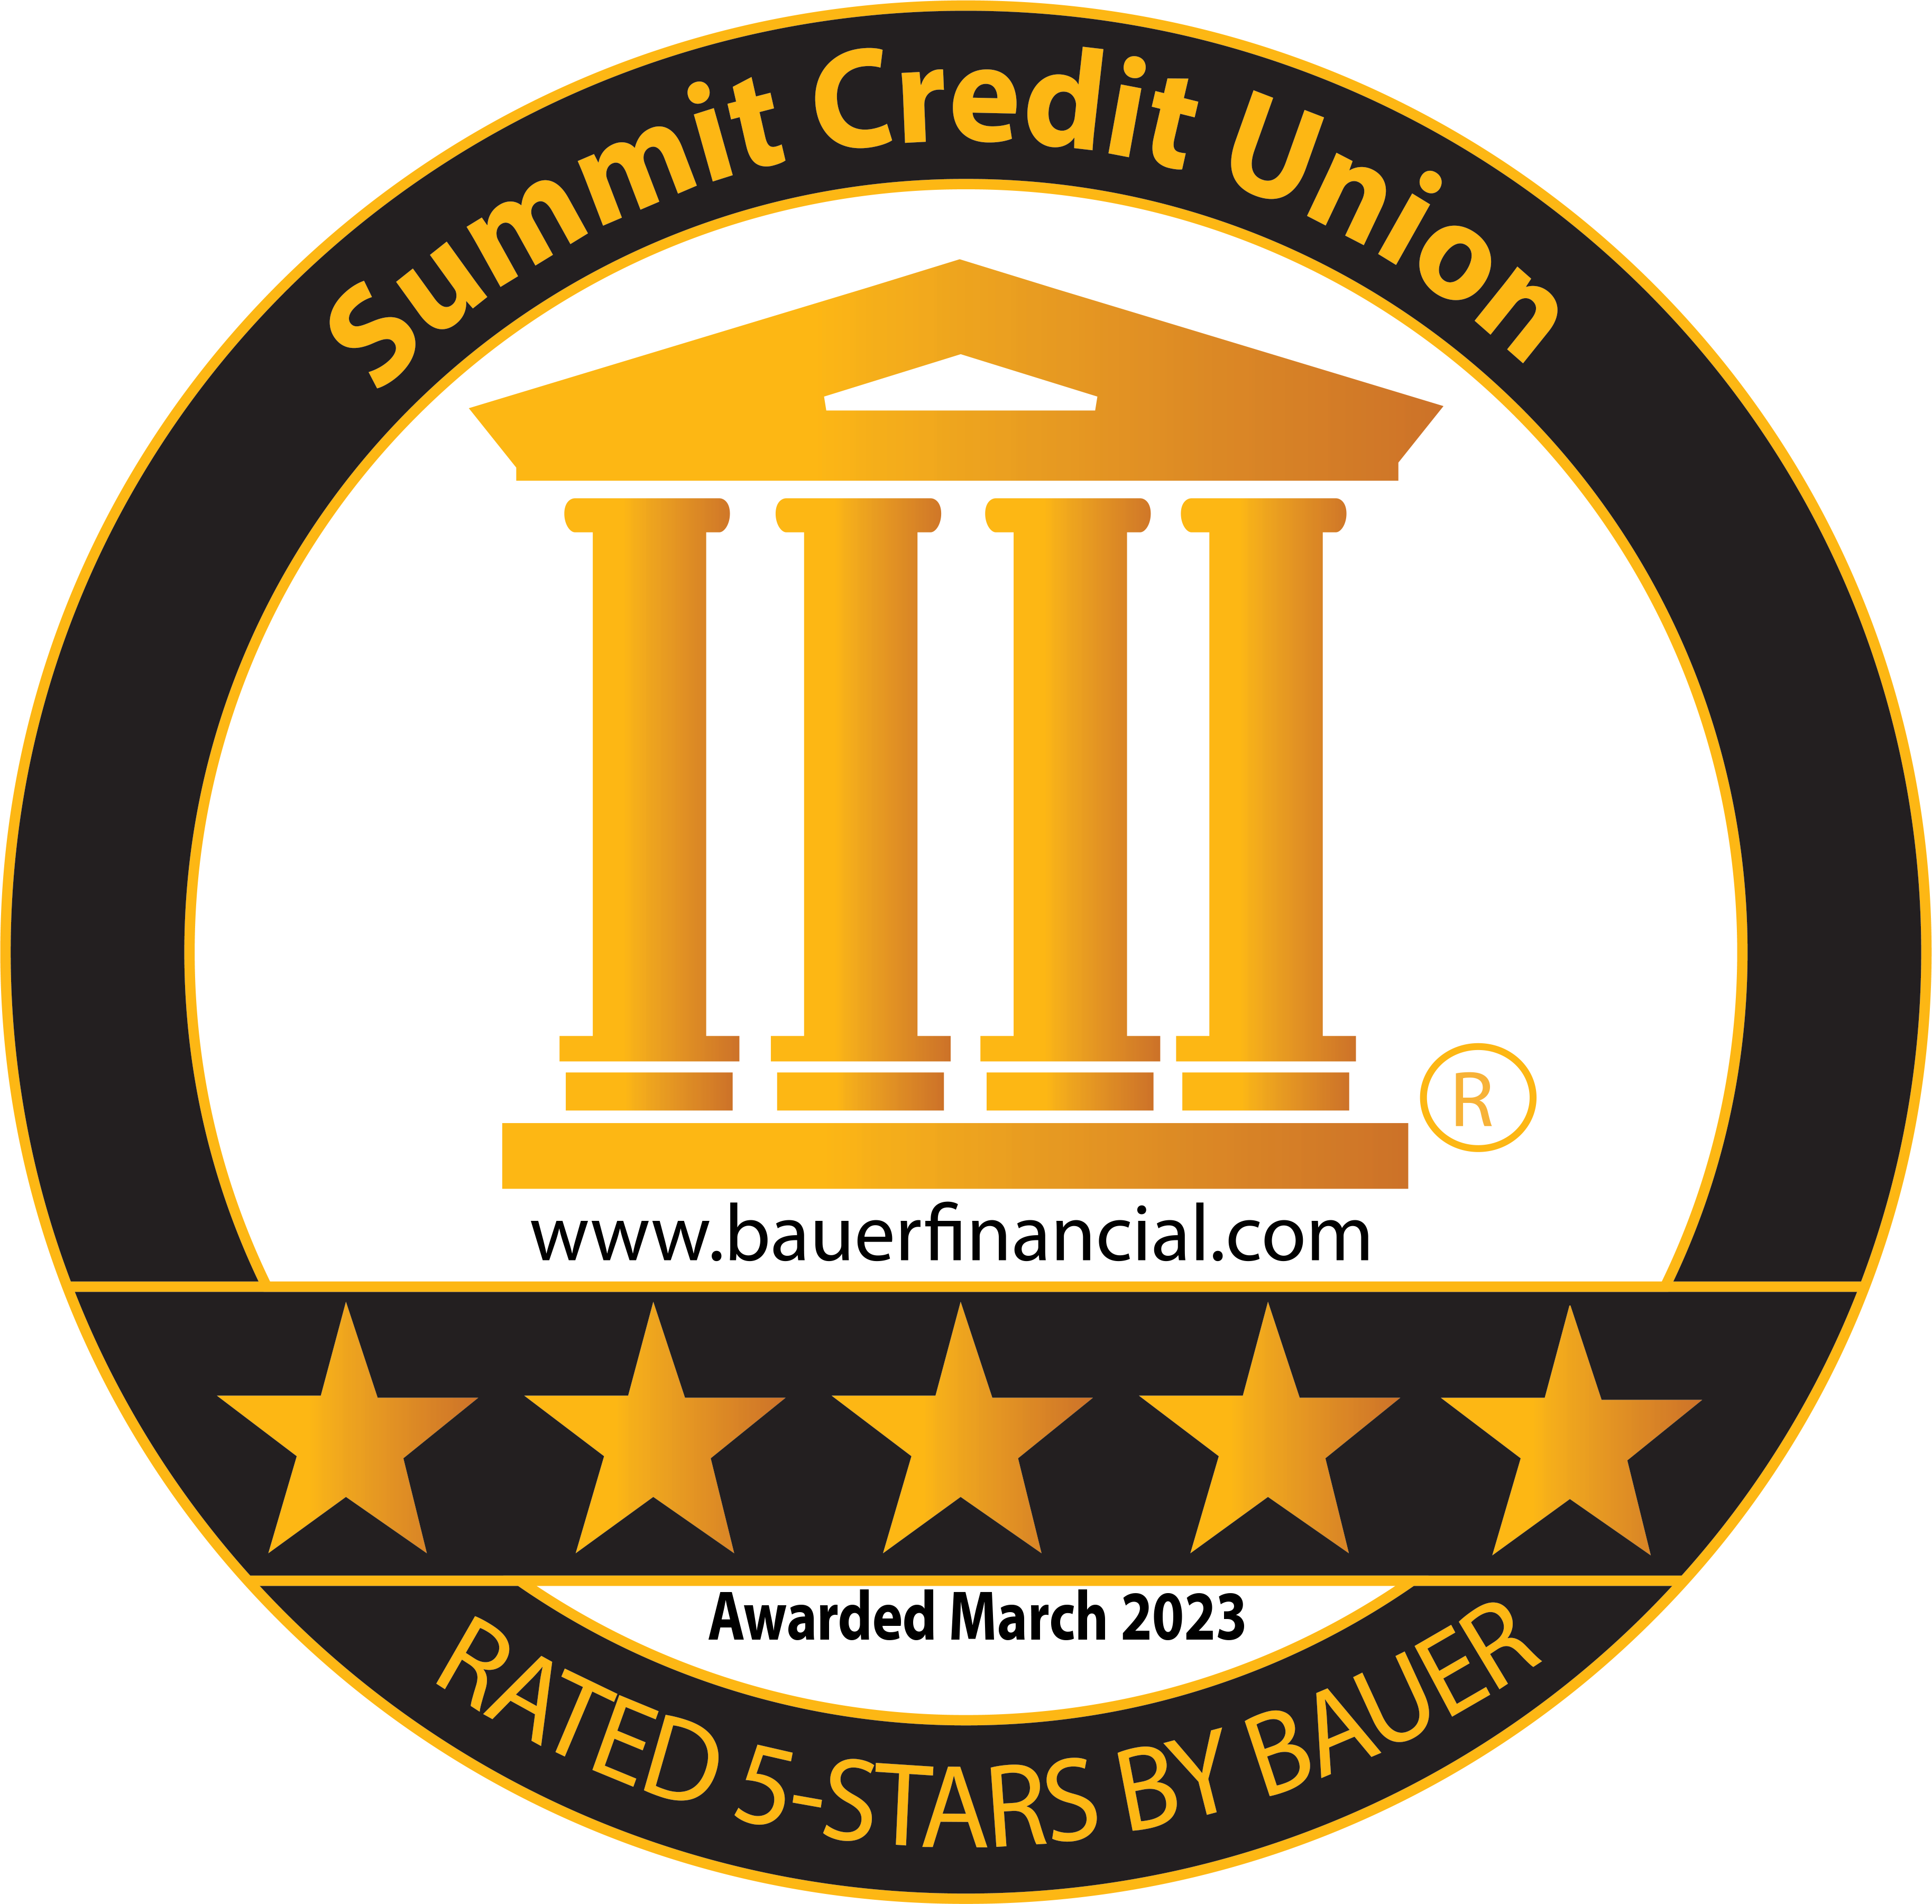

In [4]:
import requests

URL = "https://www.summitcreditunion.com/borrow/mortgage-loan#mortgage-rates"
page = requests.get(URL)

print(page.text)

This code issues an HTTP GET request to the credit union's URL. It retrieves the HTML data that the server sends back and stores that data in a Python object.

Printing the `.text` attribute of page displays the HTML that you inspected previously with your browser’s developer tools. You successfully fetched the static site content and now have access to the site’s HTML from within your Python script.

It is difficult to impossible to read a long block of HTML code. The HTML you’ll encounter will sometimes be confusing, but most sites use descriptive class names for the elements displayed. On this particular page, notice that there are no obvious class names. That is because this is a dynamic website. Instead of a full page of HTML code you instead receive JavaScript code as a response. 

In this tutorial, you’ll learn how to scrape a static website. Static sites are more straightforward to work with because the server sends you an HTML page that already contains all the page information in the response. You can parse that HTML response and immediately begin to pick out the relevant data, but there are still ways to work with dynamic websites. For now, let's access a static website with the code below.


In [5]:
import requests

URL = "https://www.basketball-reference.com/teams/MIL/2023.html"
page = requests.get(URL)

print(page.text)


<!DOCTYPE html>
<html data-version="klecko-" data-root="/home/bbr/build" lang="en" class="no-js" >
<head>
    <meta charset="utf-8">
    <meta http-equiv="x-ua-compatible" content="ie=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />
    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202309261" />
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script type="text/javascript" async=true>
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NA

Still, this just lookss like a huge mess. There are tons of HTML elements here and there, hundreds of attributes scattered about. It’s time to parse this code response with the help of Python to make it more accessible and pick out the data you want. Beautiful Soup ('bs4') is a Python library for pulling data out of HTML and XML files. It is NOT built-in to Python. 

Once installed, we can add a couple of lines of code to create a Beautiful Soup object that takes `page.content`, which is the HTML content you scraped earlier, as its input. The second argument, `html.parser`, makes certain we use the appropriate parser for HTML content (vs. something like `lxml`).

In [6]:
from bs4 import BeautifulSoup  
import requests 

URL = "https://www.basketball-reference.com/teams/MIL/2023.html"
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')   
soup


<!DOCTYPE html>

<html class="no-js" data-root="/home/bbr/build" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202309261" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {
	    var TCF_LOCATOR_NAME = '__tcfapiL

## Finding Elements by Class ID

Every element of a page can have an id attribute assigned. That id attribute makes the element uniquely identifiable on the page. Find some of these ids by parsing the page in a browser and inspect the html using the developer tools. You may also select a specific element by its ID. Suppose you’re looking for player birth dates so that you can send each player a card. This element is inside a \<table\> with an id attribute "roster". Beautiful Soup allows you to find that specific HTML element by its ID:

In [7]:
bucks_roster = soup.find(name = 'table', attrs = {'id' : 'roster'})

In [8]:
bucks_roster

<table class="sortable stats_table" data-cols-to-freeze=",2" id="roster">
<caption>Roster Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="No." class="poptip sort_default_asc center" data-stat="number" data-tip="Uniform Number" scope="col">No.</th>
<th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
<th aria-label="Pos" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
<th aria-label="Ht" class="poptip sort_default_asc center" data-stat="height" data-tip="Height" scope="col">Ht</th>
<th aria-label="Wt" class="poptip sort_default_asc center" data-stat="weight" data-tip="Weight" scope="col">Wt</th>
<th aria-label="Birth Date" class="poptip sort_default_asc center" data-stat="birth_date" scope="col">Birth Date</th>
<th aria-label=" " class="poptip center" data-stat="birth_country" scope="col"> </th>
<th aria-label="Exp"

For easier viewing you can prettify all Beautiful Soup objects. If you call `.prettify()` on the results variable that you just assigned above, then you’ll see all the HTML contained within the \<table\>

In [9]:
print(bucks_roster.prettify())

<table class="sortable stats_table" data-cols-to-freeze=",2" id="roster">
 <caption>
  Roster Table
 </caption>
 <colgroup>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
  <col/>
 </colgroup>
 <thead>
  <tr>
   <th aria-label="No." class="poptip sort_default_asc center" data-stat="number" data-tip="Uniform Number" scope="col">
    No.
   </th>
   <th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">
    Player
   </th>
   <th aria-label="Pos" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">
    Pos
   </th>
   <th aria-label="Ht" class="poptip sort_default_asc center" data-stat="height" data-tip="Height" scope="col">
    Ht
   </th>
   <th aria-label="Wt" class="poptip sort_default_asc center" data-stat="weight" data-tip="Weight" scope="col">
    Wt
   </th>
   <th aria-label="Birth Date" class="poptip sort_default_asc center" data-stat="birth_date" scope="col">
    Birth Date
   <

## Create a table of your own

Let's make a pandas dataframe to house the player birthdays by first creating a list of dictionaries. Each player will be a dictionary and each key will represent a statistical category. The corresponding value represents that player’s value for that category.

The name and birthday for each player are divided by row in the bucks_roster table, as denoted by `tr` (table row) in the HTML. Using the `.find_all()` method on tr will return a list of all rows from roster table. Thus, I’ll make a for loop on `bucks_roster.find_all(‘tr’)[1:]` to iterate through each row. The loop starts on the second row since the first row contains the header titles. I will only extract data from the two columns we care about for this example: name and birthday.

In [10]:
import pandas as pd
bucks_birthdays = []

for row in bucks_roster.find_all('tr')[1:]:  # Excluding the first 'tr', since that's the table's title head

    player = {}
    player['Name'] = row.find('a').text.strip()
    player['Birthdate'] = row.find('td', {'data-stat' : 'birth_date'}).text
   
    bucks_birthdays.append(player)

pd.DataFrame(bucks_birthdays)

,Name,Birthdate
0,Grayson Allen,"October 8, 1995"
1,Giannis Antetokounmpo,"December 6, 1994"
2,Thanasis Antetokounmpo,"July 18, 1992"
3,MarJon Beauchamp,"October 12, 2000"
4,Jevon Carter,"September 14, 1995"
5,Pat Connaughton,"January 6, 1993"
6,Jae Crowder,"July 6, 1990"
7,Goran Dragić,"May 6, 1986"
8,A.J. Green,"September 27, 1999"
9,George Hill,"May 4, 1986"


## Practice Time

Take ten minutes to create your own table of player statistics. Inspect the player totals table and create a dataframe with the following statistics: Points, Steals, Assists, Rebounds, and Blocks.


In [11]:
bucks_stats = soup.find(name = 'table', attrs = {'id' : 'per_game'})
bucks_player_stats = []

for row in bucks_stats.find_all('tr')[1:]:  # Excluding the first 'tr', since that's the table's title head

    player = {}
    player['Player'] = row.find('a').text.strip()
    player['PTS'] = row.find('td', {'data-stat' : 'pts_per_g'}).text
    player['STL'] = row.find('td', {'data-stat' : 'stl_per_g'}).text
    player['AST'] = row.find('td', {'data-stat' : 'ast_per_g'}).text
    player['TRB'] = row.find('td', {'data-stat' : 'trb_per_g'}).text
    player['BLK'] = row.find('td', {'data-stat' : 'blk_per_g'}).text
   
    bucks_player_stats.append(player)

pd.DataFrame(bucks_player_stats)

,Player,PTS,STL,AST,TRB,BLK
0,Jrue Holiday,19.3,1.2,7.4,5.1,0.4
1,Giannis Antetokounmpo,31.1,0.8,5.7,11.8,0.8
2,Brook Lopez,15.9,0.5,1.3,6.7,2.5
3,Grayson Allen,10.4,0.9,2.3,3.3,0.2
4,Bobby Portis,14.1,0.4,1.5,9.6,0.2
5,Khris Middleton,15.1,0.7,4.9,4.2,0.2
6,Pat Connaughton,7.6,0.6,1.3,4.6,0.2
7,Joe Ingles,6.9,0.7,3.3,2.8,0.1
8,Jevon Carter,8.0,0.8,2.4,2.5,0.4
9,George Hill,5.0,0.5,2.5,1.9,0.1


Now let's try another website. Navigate to https://news.wisc.edu and we will try to scrape information from the UW-Madison News webpage. Start by opening an instance of Google Chrome, then navigate to https://news.wisc.edu. Right click anywhere on the page to View Page Source. You can also press `control+U`. This is HTML code that structures the webpage, putting all of the text and 
images in the right places. Our goal is to extract the headline of each “UW News” article. They are denoted by the tag 

`<h3 class="headline">`

Find these tags in the HTML. Design a script to extract the article associated with each headline. 
Store each article’s web address as a variable called url. The url must be contained within quotes. 
For example: 




 
 


In [12]:
url = 'https://news.wisc.edu/flag-of-ho-chunk-nation-to-fly-atop-bascom-hall-for-first-time-in-universitys-history/'

Then on the next line of your code create a web request to access the url:  

In [13]:
r = requests.get( url )
soup = BeautifulSoup(r.content,"html.parser") 

The URL request will be successful if typing `r.status code` returns the code 200. Once successfully connected to the url you will parse its content into Beautiful Soup HTML format: 

In [15]:
r.status_code

200

In [16]:
print(soup) 

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html class="ie ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html class="ie ie8" lang="en-US">
<![endif]-->
<!--[if IE 9]>
<html class="ie ie9" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) | !(IE 9)  ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<title>Flag of Ho-Chunk Nation to fly atop Bascom Hall for first time in university’s history</title>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- Google tag (gtag.js) -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-1KZJ965FVN"></script>
<script>
    window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());
    gtag('config', 'G-1KZJ965FVN', {
      'cookie_domain': 'none',
      'send_page_view': false
    });
  </script>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[]

To locate the title tag we could use the following:

In [18]:
title = soup.find('title') 
title.get_text() 

'Flag of Ho-Chunk Nation to fly atop Bascom Hall for first time in university’s history'

To print the article, you will need to print all of the paragraphs. 

In [19]:
paragraphs = soup.find_all('p')

The code above locates all text encapsulated within the \<p\> paragraph tag. When you print out 
paragraphs, you will see that both the text and tags are returned. 

In [20]:
paragraphs

[<p>On Nov. 5, the University of Wisconsin–Madison will fly the flag of the Ho-Chunk Nation atop Bascom Hall, part of an ongoing commitment to educate the campus community about First Nations history and to recognize the land as the ancestral home of the Ho-Chunk. Flag raisings are part of contemporary Ho-Chunk culture.</p>,
 <p>This will be the first time in the university’s history that the Ho-Chunk Nation’s flag will fly above Bascom Hall. It also will be the first time the university will show respect to another nation by flying that nation’s flag for a day along with the U.S. flag and the Wisconsin state flag.</p>,
 <p>The flag will be raised during a public ceremony — <a href="https://today.wisc.edu/events/view/164436">“Ho-Chunk Nation Flag-Raising on Bascom Hill: Honor, Respect, and Sacrifice”</a> — at 10 a.m. Nov. 5 in front of Bascom Hall.</p>,
 <p>“It is appropriate that the Ho-Chunk Nation flag be the first to be honored in this way,” says Aaron Bird Bear, the university’s d

## Practice Time

Go to any news article on the UW website and extract just the text (no tags). You can do this by iterating through each 'paragraph in paragraphs' and calling `paragraph.get_text()`. Join together all the paragraphs into a single string, separated by the newline character ’\n’. 

In [24]:
url = "https://news.wisc.edu/ojibwe-birchbark-canoe-returns-to-lake-mendota-after-10-years-connecting-to-1000s-of-years-of-art-and-culture/"

r = requests.get( url )
soup = BeautifulSoup(r.content,"html.parser") 
r.status_code
paragraphs = soup.find('p')
paragraphs.get_text()

'Ten years ago, a birchbark canoe cut through the icy waters of Lake Mendota, paddled by its maker, Wayne Valliere (Mino-giizhig in Ojibwe) of the Lac du Flambeau Band of Lake Superior Chippewa. Once back on land, the canoe was installed in Dejope Residence Hall on the University of Wisconsin–Madison campus, where it has hung on display from the dining hall rafters ever since.'

# Automated Tracking and Database Building

These exercises are designed to familiarize you with the following workflows:

* Automating repetitive tasks on macOS and Windows machines
* Running python scripts at fixed intervals
* Collecting and storing data via APIs and scraping
* Accessing pytrends to track the relative frequency of search terms 

## TASK 1.0: Using Terminal / Command Line

Open the command prompt as an administrator. Right click and click “Run as Administrator”. Once it is open, enter the following command at the prompt:

start https://www.youtube.com/watch?v=xvFZjo5PgG0

Pretty cool right? Using the graphical interface to complete tasks makes many tasks easier for the novice computer user, but scripting commands from the command prompt can be a powerful tool for more advanced users. In fact, there is almost nothing you can’t do from the command line. For instance, remember what we did with wget? 

Launch the command prompt and press "Win-R," type "cmd" and press "Enter" to open the cmd prompt. Once open, you can launch a web browser and open a site. Type "start iexplore" and press "Enter" to open Internet Explorer and view its default home screen. Alternatively, type "start firefox," "start opera" or "start chrome" and press "Enter" to open one of those browsers. Add an address to the command to open that particular address in a browser. As an example, `start iexplore www.google.com` opens the Google search page in Internet Explorer.

## TASK 2.0: Automating Repetitive Processes

Typing in commands is time consuming and tedious. But command line actions can easily be repeated ad nauseum using Task Scheduler. To launch the Task Scheduler in Windows 10 click the Start button, clicking All Apps, and typing “schedule“, then choose Task Scheduler from the list of apps. Once the main windows comes up, choose Create Task…

You will also see where you can select “Run whether user is logged on or not.” If you need to run a Python script in production where you won’t necessarily be logged on all the time, then you should select the “whether user is logged on or not” option. You will need to have the appropriate permissions for this to work for you. If you’re an administrator on the machine you’re creating the task, then this shouldn’t be a problem.

If you’re just running a task on a computer where you’ll be logged on when you need it to run, then you can select the “Run only when user is logged on” option. Configure it for Windows 10 name your task “Do Your Homework”. This task will run under your user account. 

Now move on to the Triggers tab to set up the schedule when you want to run. In this example, let’s start with every other minute starting right now. But what is it that you are doing every other minute? That is handled on the Actions tab. We want to “Start a program”, specifically a web browser. You can add an argument, for instance a specific page you want to open up. Let’s point the web browser to load the canvas dashboard by entering “https://canvas.wisc.edu”.

Ever been caught in an endless loop of distraction. You have a big test tomorrow, but studying can’t start until you finish looking at all of these cat pictures. You need to start writing a paper, but that can wait until after another episode of your favorite show...and another...and another. Wouldn’t it be great if a window would pop up and remind you what is important? Good news, now you can make your own commitment device!

### Step 1

The first thing to do is open Task Scheduler. For that, open the Start menu, search for “Task Scheduler,” and click the result. You can also run the “taskschd.msc” command. Once open, click the “Create Task” option on the right sidebar.Type a name and description in the “Name” and “Description” fields. Click “Next” to continue.

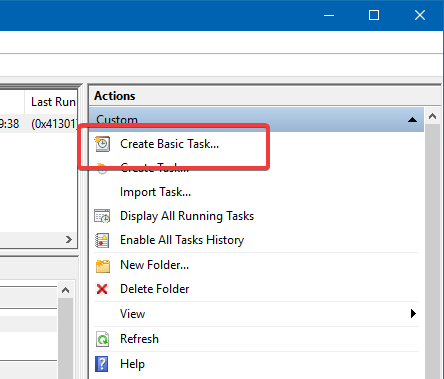

### Step 2 

Select a task trigger of your choice to signal when the task should start. It makes sense to chose something more frequent than the “Daily” option so that we can confirm this task is active. That means the task is triggered daily. It also makes sense to setup an end date so that you don't accidently leave this running forever!

### Step 3

Pick the task you want completed. For this example we will open a web browser to the UW website. Choose the “Start a program” option and navigate to the internet explorer folder. Find the .exe file and select it. Add the UW website URL as an argument to make sure that is the page that is opened. 




## Practice Time

Let's create a new task in harmony. Use the web address above to play Rick Astley at the same time as your peers. I will tell you the time to run your program and you schedule it!